<a href="https://colab.research.google.com/github/evkis/data_analysis_science_pet/blob/main/11_human_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

https://drive.google.com/file/d/1k4Mymki8Rn7JIodvoG5qMNfr1pvaPZL5/view?usp=sharing

In [88]:
! gdown --id 1k4Mymki8Rn7JIodvoG5qMNfr1pvaPZL5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1k4Mymki8Rn7JIodvoG5qMNfr1pvaPZL5
To: /content/used_cars_uk.zip
100% 1.15M/1.15M [00:00<00:00, 10.2MB/s]


In [ ]:
! unzip /content/used_cars_uk.zip

Archive:  /content/used_cars_uk.zip
replace audi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/bmw.csv')

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [7]:
len(df)

10781

In [8]:
df.isna().mean().sort_values(ascending=False)

model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [9]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [10]:
df.rename(columns={'fuelType':'fuel','engineSize':'e_size'},inplace=True)

In [11]:
df.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [12]:
df.model.value_counts(dropna=False)

 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 7 Series     106
 X6           106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

In [13]:
df.model=df.model.str.lower()

In [14]:
df.year.value_counts(dropna=False)

2019    3485
2016    1882
2017    1721
2015     922
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2003       2
2000       2
1996       1
1997       1
1998       1
Name: year, dtype: int64

In [15]:
df.transmission.value_counts(dropna=False)

Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [16]:
df.transmission=df.transmission.str.lower()

In [17]:
df.fuel.value_counts(dropna=False)

Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuel, dtype: int64

In [18]:
df.fuel=df.fuel.str.lower()

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
train, test = train_test_split(df,train_size=0.75, random_state=42)

In [29]:
len(test)/len(df)

0.2500695668305352

In [30]:
train.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size
930,5 series,2013,12791,semi-auto,55642,diesel,145,55.4,2.0
4052,1 series,2019,23995,semi-auto,1527,petrol,145,43.5,1.5
1197,x5,2015,25995,automatic,43344,diesel,200,47.1,3.0
7893,2 series,2019,25000,automatic,4000,petrol,145,47.9,2.0
7571,1 series,2015,10950,manual,33000,diesel,20,72.4,1.5


In [31]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

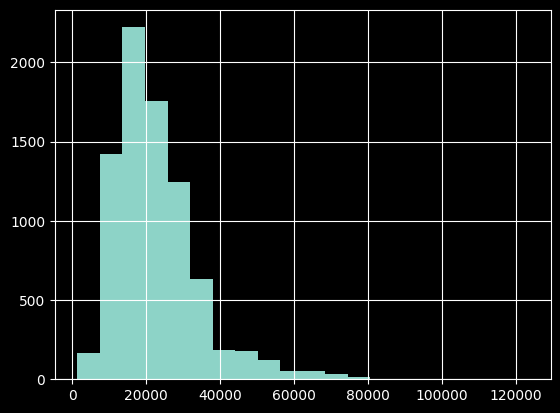

In [33]:
train.price.hist(bins=20)

In [34]:
train.price.describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [35]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


<Axes: xlabel='year'>

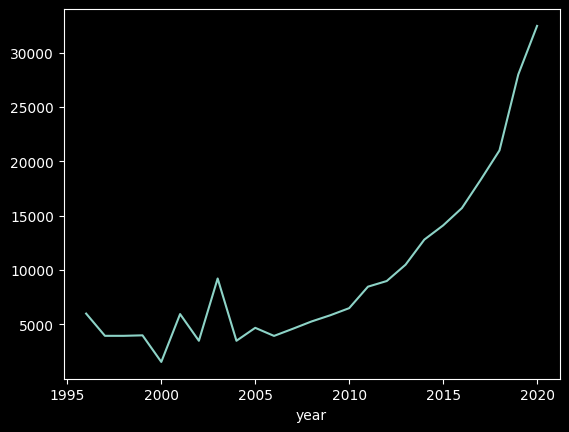

In [36]:
train.groupby('year')['price'].median().plot()

In [41]:
# baseline
train['price_pred_mean']= train.price.mean()

In [42]:
train.head()

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_mean
930,5 series,2013,12791,semi-auto,55642,diesel,145,55.4,2.0,22668.821645
4052,1 series,2019,23995,semi-auto,1527,petrol,145,43.5,1.5,22668.821645
1197,x5,2015,25995,automatic,43344,diesel,200,47.1,3.0,22668.821645
7893,2 series,2019,25000,automatic,4000,petrol,145,47.9,2.0,22668.821645
7571,1 series,2015,10950,manual,33000,diesel,20,72.4,1.5,22668.821645


In [45]:
train['err']=train.price_pred_mean-train.price

In [47]:
train.head(5)

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_mean,err
930,5 series,2013,12791,semi-auto,55642,diesel,145,55.4,2.0,22668.821645,9877.821645
4052,1 series,2019,23995,semi-auto,1527,petrol,145,43.5,1.5,22668.821645,-1326.178355
1197,x5,2015,25995,automatic,43344,diesel,200,47.1,3.0,22668.821645,-3326.178355
7893,2 series,2019,25000,automatic,4000,petrol,145,47.9,2.0,22668.821645,-2331.178355
7571,1 series,2015,10950,manual,33000,diesel,20,72.4,1.5,22668.821645,11718.821645


In [49]:
train['err_abs']=abs(train.err)

In [50]:
train.err_abs.mean()

8450.556631461715

In [52]:
train['err_abs_pct']=train.err_abs/train.price

In [55]:
train.err_abs_pct.mean()

0.48316912602731443

In [56]:
train['price_pred_median']=train.price.median()

In [57]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [59]:
mean_absolute_error(train['price'],train['price_pred_mean'])

8450.556631461715

In [61]:
mean_absolute_percentage_error(train['price'],train['price_pred_mean'])

0.48316912602731443

In [63]:
mean_absolute_error(train['price'],train['price_pred_median'])

8220.5146567718

In [64]:
mean_absolute_percentage_error(train['price'],train['price_pred_median'])

0.41711111879393314

In [65]:
test['price_pred_median']=train.price.median()

In [66]:
test

,model,year,price,transmission,mileage,fuel,tax,mpg,e_size,price_pred_median
8728,1 series,2018,15300,manual,36469,diesel,150,50.4,1.5,20022.0
761,5 series,2014,15495,semi-auto,51565,diesel,160,51.4,2.0,20022.0
7209,x3,2019,39875,semi-auto,8988,diesel,150,36.7,3.0,20022.0
6685,2 series,2019,21730,automatic,5054,petrol,145,39.2,1.5,20022.0
8548,2 series,2018,13799,manual,13369,diesel,145,65.7,1.5,20022.0
...,...,...,...,...,...,...,...,...,...,...
9825,4 series,2019,25500,automatic,3250,petrol,145,48.7,2.0,20022.0
3522,7 series,2019,52700,semi-auto,706,diesel,145,44.1,3.0,20022.0
9757,3 series,2017,15795,automatic,64000,hybrid,0,134.5,2.0,20022.0
6100,4 series,2019,29840,automatic,6000,diesel,145,60.1,2.0,20022.0


In [68]:
mean_absolute_error(test['price'],test['price_pred_median'])

8211.845697329376

In [70]:
mean_absolute_percentage_error(test['price'],test['price_pred_median'])

0.409212791738344

In [71]:
# year algorythm

In [73]:
train.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


In [78]:
model_year_mean=train.groupby('year')['price'].mean().reset_index()

In [76]:
model_year_median=train.groupby('year')['price'].median().reset_index()

In [79]:
model_year_mean.columns

Index(['year', 'price'], dtype='object')

In [81]:
model_year_mean.columns=['year', 'price_pred_year_mean']

In [83]:
model_year_median.columns=['year', 'price_pred_year_median']

In [87]:
train=train.merge(model_year_mean,how='left',on='year')